# Sentiment Analysis for Tweets

In this notebook we will be doing sentiment analysis based on the given tweets. 

- Part One: 
We will using cleaning the tweets (cleaning as: removing mentions @, removing links, removing stopwords, correcting short words (isn't : is not) and removing rare words)

- Part Two:
First, we will perform basic sentiment analysis with **Tf-idf** and using **Naive Bayes** algorithm
Also, we will perform advanced and better sentiment analysis with **Pre-trained WordEmbeddings** and **LSTM**


# Outlines

- **Observe Dataset**.


- **Preprocessing Step I**
    - Lowercasing all the tweets.
    - Romoval of punctuations
    - Removal of Stopwords
    - Lemmatization
    
    
- **Preprocessing Step II**
    - Basic Tf-Idf
    - Word Embedding
    
    
- **Preparing for Models**
    - Splitting Dataset
    
    
- **Models**
    - Naive Bayes
    - LSTM

# Observe Dataset

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

In [ ]:
path = '../input/sentimental-analysis-for-tweets/sentiment_tweets3.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head()

In [ ]:
df['label (depression result)'].value_counts()

In [ ]:
df.tail()

In [ ]:
## Let's see some of the text

df.loc[10311]['message to examine']

In [ ]:
df.loc[3]['message to examine']

In [ ]:
df.loc[1234]['message to examine']

There are 802312 tweets, altogether.

In [ ]:
# Checking if there is any null values.

df.isnull().sum()

In [ ]:
# Check if there's any number

for i in df['message to examine']:
  for j in i.split():
    if j.isdigit():
      s = "yes"
    else:
      s = "no"
print(s)

# Text Preprocessing

- Lowercasing all the tweets.
- Romoval of punctuations
- Removal of Stopwords
- Lemmatization



## Remove Numbers

In [ ]:
import re

In [ ]:
# First Remove all the numbers

def remove_numbers(text):
  return ' '.join([i for i in str(text).split() if not i.isdigit()])

df['clean_tweets'] = df['message to examine'].apply(lambda x: remove_numbers(x))

In [ ]:
df

In [ ]:
# Lowercasing all the tweets

df['clean_tweets'] = df['clean_tweets'].str.lower()

## Remove Weblinks

In [ ]:
# Removal of Weblinks

def remove_weblinks(text):
  return re.sub(r"http\S+", "", text)

df['clean_tweets2'] = df['clean_tweets'].apply(lambda x: remove_weblinks(x))

In [ ]:
df

## Remove Twitter Mentions

In [ ]:
def remove_twitter(text):
  return re.sub('@[\w]+','',text)

In [ ]:
df['clean_tweets3'] = df['clean_tweets2'].apply(lambda x: remove_twitter(x))

In [ ]:
df

## Removal of Punctuations

In [ ]:
import string

In [ ]:
PUNCT_TO_REMOVE = string.punctuation

In [ ]:
def remove_punctuation(text):
  return text.translate(str.maketrans('','', PUNCT_TO_REMOVE))

In [ ]:
df['clean_tweets4'] = df['clean_tweets3'].apply(lambda x: remove_punctuation(x))

In [ ]:
df

## Removal of Stopwords

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

In [ ]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])


In [ ]:
df['clean_tweets5'] = df['clean_tweets4'].apply(lambda x: remove_stopwords(x))

In [ ]:
df

## Frequent Words

In [ ]:
from collections import Counter
cnt = Counter()

for text in df['clean_tweets5'].values:
  for word in text.split():
    cnt[word] += 1

cnt.most_common(10)

Since, this is a sentiment analysis, **depression** word is important for sentiment analysis, let's keep this as it is.

## Rare words

In [ ]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

# Let's see what are the Rarewords

RAREWORDS

In [ ]:
# Let's remove these

def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in RAREWORDS])


In [ ]:
df['clean_tweets6'] = df['clean_tweets5'].apply(lambda x: remove_stopwords(x))

## Lemmatization


In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

wordnet_map = {"n": wordnet.NOUN, "v": wordnet.VERB, "j": wordnet.ADJ, "r": wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text])

df["text_lemmatized"] = df['clean_tweets6'].apply(lambda text: lemmatize_words(text))


In [ ]:
df

## Replace some short words

I see some of the short words like **dont**,  **im**. I've just used most frequent words used based on my knowledge, you can add up.


In [ ]:
short_words = {
"aint": "am not",
"arent": "are not",
"cant": "cannot",
"'cause": "because",
"couldve": "could have",
"couldnt": "could not",
"didnt": "did not",
"doesnt": "does not",
"dont": "do not",
"hadnt": "had not",
"hasnt": "has not",
"havent": "have not",
"im": "I am",
"em": "them",
"ive": "I have",
"isnt": "is not",
"lets": "let us",
"theyre": "they are",
"theyve": "they have",
"wasnt": "was not",
"well": "we will",
"were": "we are",
"werent": "were not",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def replace_short_words(text):
  for word in text.split():
    if word in short_words:
      text = text.replace(word, short_words[word])
  
  return text

In [ ]:
df["clean_tweets7"] = df['text_lemmatized'].apply(lambda text: replace_short_words(text))

In [ ]:
df

Our text is clean and ready for training. But let's delete all the previous columns.

In [ ]:
xdf = df[['Index','label (depression result)','clean_tweets7']]

In [ ]:
xdf

In [ ]:
xdf.columns = ['Index','Labels','Tweets']

In [ ]:
xdf

In [ ]:
# Plot the word cloud

from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [ ]:
sentences = xdf['Tweets'].tolist()

In [ ]:
len(sentences)

In [ ]:
# Joining sentences (combining all the sentences that we have)

joined_sentences = " ".join(sentences)

In [ ]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(joined_sentences));

In [ ]:
xdf['Labels'].value_counts()

In [ ]:
# Let's visualize postive and negative tweets

In [ ]:
positive_tweets = xdf[xdf['Labels'] == 0]
positive_sentences = positive_tweets['Tweets'].tolist()
positive_string = " ".join(positive_sentences)

In [ ]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(positive_string));

In [ ]:
# Let's visualize negative tweets

In [ ]:
negative_tweets = xdf[xdf['Labels'] == 1]
negative_sentences = negative_tweets['Tweets'].tolist()
negative_string = " ".join(negative_sentences)

In [ ]:
plt.figure(figsize = (12,8))
plt.imshow(WordCloud().generate(negative_string));

# Text Preprocessing : Part II

- tf-idf 
- word2vec

### Basic Sentiment Analaysis

First, we will build our model with Basic Sentiment Analysis technique with **tf-idf** and **NaiveBayes Classifier**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
cv = TfidfVectorizer()

In [ ]:
tfidf = cv.fit_transform(xdf['Tweets'])

## Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
tfX_train, tfX_test, tfy_train, tfy_test = train_test_split(tfidf, xdf['Labels'], test_size = 0.2)

In [ ]:
tfX_train

In [ ]:
tfX_train.shape

## Models and Evaluation 

In [ ]:
## NaiveBayes

from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()

In [ ]:
mnb.fit(tfX_train, tfy_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_mnb = mnb.predict(tfX_test)

print(f'Accuracy score is : {accuracy_score(tfy_test, y_pred_mnb)}')

In [ ]:
cf = confusion_matrix(tfy_test, y_pred_mnb, labels = [1,0])
cf

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(cf, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

### Better Sentiment Analaysis

We will improve our model with **LSTIM** and **Pre-trained Word Embeddings**

The use of pre-trained word embeddings. 

The theory is that these pre-trained vectors already have words with similar semantic meaning close together in vector space, e.g. "sad", "depressed", "bad" are nearby. This gives our embedding layer a good initialization as it does not have to learn these relations from scratch.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub


In [ ]:
# Load Pretrained Word2Vec

embed = hub.load("https://tfhub.dev/google/Wiki-words-250/2")

In [ ]:
def get_max_length(df):
  ## get max token counts from train data,
  ## so we use this number as fixed length input to RNN cell

  max_length = 0
  for row in xdf['Tweets']:
    if len(row.split(" ")) > max_length:
      max_length = len(row.split(" "))
  
  return max_length

In [ ]:
get_max_length(xdf['Tweets'])

In [ ]:
def get_word2vec_enc(tweets):
  ## get word2vec value for each word in sentence
  # concatenate word in numpy array, so we can use it as RNN input

  encoded_tweets = []
  for tweet in tweets:
    tokens = tweet.split(" ")
    word2vec_embedding = embed(tokens)
    encoded_tweets.append(word2vec_embedding)
  return encoded_tweets


In [ ]:
def get_padded_encoded_tweets(encoded_tweets):
  # for short sentences, we prepend zero padding so all input to RNN
  # has same length

  padded_tweets_encoding = []
  for enc_tweet in encoded_tweets:
    zero_padding_cnt = max_length - enc_tweet.shape[0]
    pad = np.zeros((1, 250))
    for i in range(zero_padding_cnt):
      enc_tweet = np.concatenate((pad, enc_tweet), axis = 0)
    padded_tweets_encoding.append(enc_tweet)
  return padded_tweets_encoding

In [ ]:
def sentiment_encode(sentiment):
    if sentiment == 0:
        return [0,1]
    else:
        return [1,0]

In [ ]:
def preprocess(df):
  # encode text value to numeric value

  tweets = df['Tweets'].tolist()

  encoded_tweets = get_word2vec_enc(tweets)
  padded_encoded_tweets = get_padded_encoded_tweets(encoded_tweets)

  #encoded sentiment
  sentiments = df['Labels'].tolist()
  encoded_sentiment = [sentiment_encode(sentiment) for sentiment in sentiments]

  X = np.array(padded_encoded_tweets)
  Y = np.array(encoded_sentiment)

  return X, Y

In [ ]:
# Preprocess 

max_length = get_max_length(xdf)
max_length

In [ ]:
tdf = xdf.sample(frac = 1)
train = tdf[:8000]
test = tdf[8000:]

In [ ]:
train.shape, test.shape

In [ ]:
train_X, train_Y = preprocess(train)
test_X, test_Y = preprocess(test)

In [ ]:
## Build Model

In [ ]:
# LSTM

model = Sequential()
model.add(LSTM(32))
model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

## Train

In [ ]:

model.fit(train_X, train_Y, epochs = 10)

In [ ]:
model.summary()

## Test

In [ ]:
score, acc = model.evaluate(test_X, test_Y, verbose = 2)
print("Test Score:", score)
print("Test Accuracy:", acc)

In [ ]:
# Confusion Matrix

y_pred = model.predict(test_X)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
matrix = metrics.confusion_matrix(test_Y.argmax(axis = 1), y_pred.argmax(axis = 1), labels = [1,0])

In [ ]:
matrix

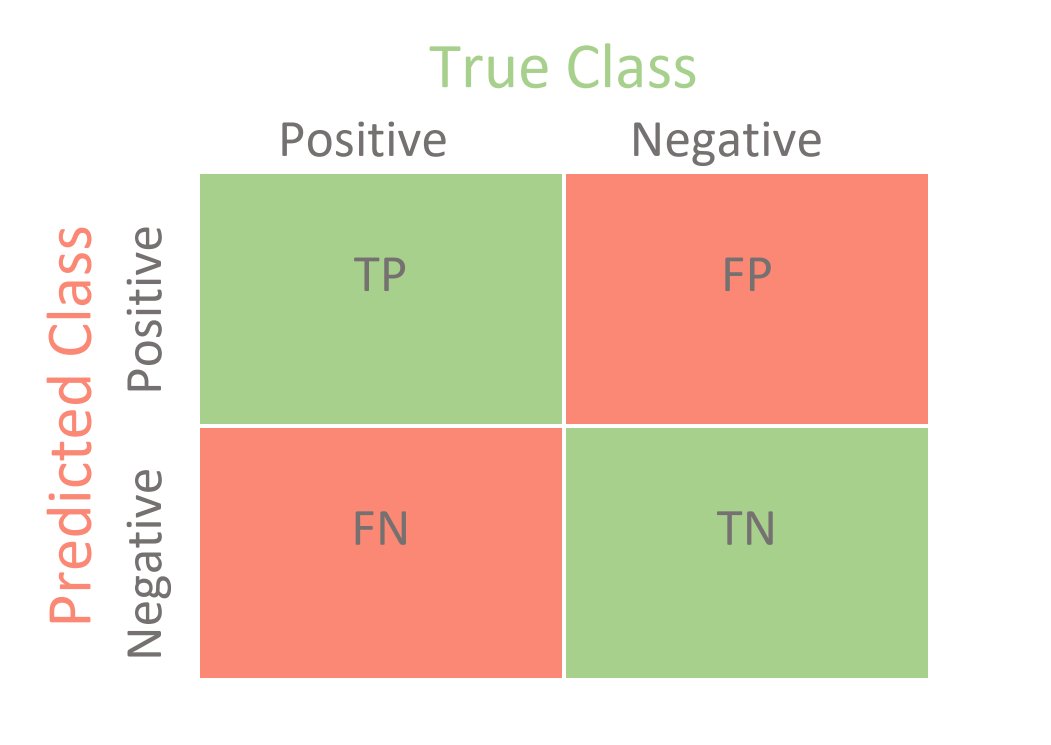

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

plt.figure(figsize = (8,6))
sns.set(font_scale=1)
sns.heatmap(matrix, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

Footnotes:

https://github.com/minsuk-heo/tf2/blob/master/jupyter_notebooks/10.Word2Vec_LSTM.ipynb


https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing